In [1]:
import pandas as pd

# Load the saved dataset
race_results_df = pd.read_csv('race_results.csv')

# Display the first few records of the dataset
race_results_df.head()


,year,round,driver_name,constructor,position,points,starting_position,fastest_lap_time
0,2000,1,Michael Schumacher,Ferrari,1,10.0,3,NaN
1,2000,1,Rubens Barrichello,Ferrari,2,6.0,4,NaN
2,2000,1,Ralf Schumacher,Williams,3,4.0,11,NaN
3,2000,1,Jacques Villeneuve,BAR,4,3.0,8,NaN
4,2000,1,Giancarlo Fisichella,Benetton,5,2.0,9,NaN


## Loading the Dataset and Initial Exploration

In this step, we load the previously saved dataset containing Formula 1 race results into a pandas DataFrame. The first few records of the dataset are displayed to provide an initial glimpse of the data's structure.


In [2]:
# Check for missing values
missing_values = race_results_df.isnull().sum()

# Clean missing values (if needed)
# race_results_df = race_results_df.dropna()

# Filter or transform data as necessary
# For example, convert lap times to seconds for analysis
# race_results_df['Fastest_Lap_Time'] = race_results_df['Fastest_Lap_Time'].apply(convert_to_seconds)


## Data Preprocessing

Before analysis, it's essential to preprocess the data. We start by checking for missing values in each column and considering how to handle them. If necessary, we can apply cleaning steps, such as removing or imputing missing data. Additionally, we might transform the data to a suitable format, such as converting lap times to seconds for easier analysis.


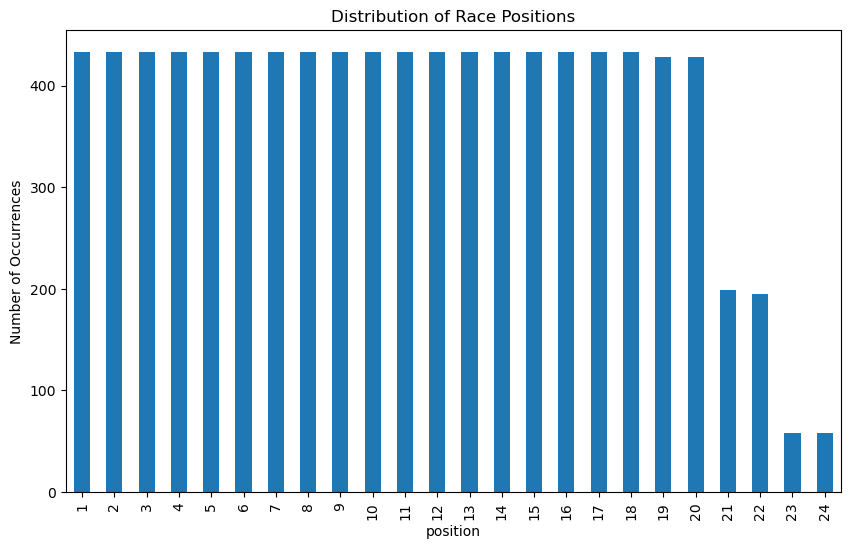

In [6]:
import matplotlib.pyplot as plt

# Summary statistics
summary_stats = race_results_df.describe()

# Number of unique drivers and teams
num_unique_drivers = race_results_df['driver_name'].nunique()
num_unique_teams = race_results_df['constructor'].nunique()

# Visualize distribution of positions
plt.figure(figsize=(10, 6))
race_results_df['position'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Race Positions')
plt.show()


## Data Analysis and Visualization

Now that the dataset is preprocessed, we can proceed to analyze and visualize the data. We calculate summary statistics to provide an overview of key metrics. For instance, these statistics might include mean, median, and quartiles for numeric variables.

We also explore categorical data, such as the number of unique drivers and teams participating. To gain insights, we create visualizations, such as a bar plot showing the distribution of race positions. This visualization helps us understand how frequently each position occurs across the races.


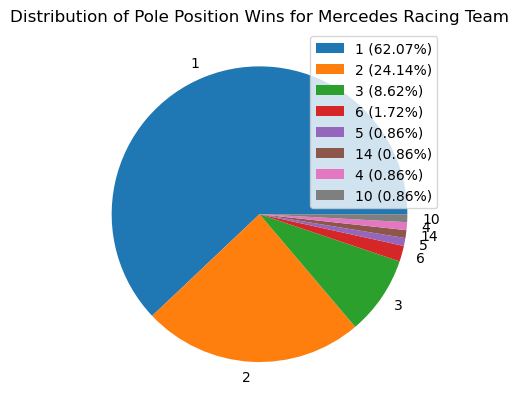

In [18]:
# Filter the dataset for Red Bull Racing Team
mercedes_team_data = race_results_df[race_results_df['constructor'] == 'Mercedes']

# Collect Red Bull's victories from the pole position
mercedes_pole_victories = race_results_df[(race_results_df['constructor'] == 'Mercedes') & (race_results_df['position'] == 1)]

# Count the number of wins for each starting position
pole_win_counts = mercedes_pole_victories['starting_position'].value_counts()

# Plot a pie chart to visualize pole position wins
pie_labels = pole_win_counts.index.tolist()
pie_sizes = pole_win_counts.values.tolist()

fig, ax = plt.subplots()
ax.pie(pie_sizes, labels=pie_labels)

# Add a legend showing the percentage of wins from each starting position
total_pole_wins = sum(pie_sizes)
win_percentages = [size / total_pole_wins * 100 for size in pie_sizes]
legend_labels = [f'{label} ({percentage:.2f}%)' for label, percentage in zip(pie_labels, win_percentages)]
ax.legend(legend_labels)
ax.set_title('Distribution of Pole Position Wins for Mercedes Racing Team')

plt.show()


This pie chart shows the distribution of pole position wins for Mercedes. Most victories originate from the front row of the starting grid, Especially positions 1 and 2. Proving the importance of securing a favorable starting position.


In [25]:
# Calculate the correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Mercedes
mercedes_corr = mercedes_team_data[mercedes_team_data['starting_position'].isin([1, 2]) & mercedes_team_data['position'].isin([1, 2])].corr().loc['position', 'starting_position']

print(f"Correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Mercedes: {mercedes_corr:.2f}")

redbull_team_data = race_results_df[race_results_df['constructor'] == 'Red Bull']
# Calculate the correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Red Bull
redbull_corr = redbull_team_data[redbull_team_data['starting_position'].isin([1, 2]) & redbull_team_data['position'].isin([1, 2])].corr().loc['position', 'starting_position']

print(f"Correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Red Bull Racing Team: {redbull_corr:.2f}")

Ferrari = race_results_df[race_results_df['constructor'] == 'Ferrari']
# Calculate the correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Ferrari
ferrari_corr = Ferrari[Ferrari['starting_position'].isin([1, 2]) & Ferrari['position'].isin([1, 2])].corr().loc['position', 'starting_position']

print(f"Correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Ferrari: {ferrari_corr:.2f}")


Correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Mercedes: 0.33
Correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Red Bull Racing Team: 0.15
Correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 for Ferrari: 0.16


The correlation between starting from positions 1 or 2 and finishing in positions 1 or 2 is not significant for any constructors. While starting in position 1 often leads to finishing at the front, this link isn't strong. Dominance in a year hinges on consistently outperforming rivals, emphasizing the importance of starting at the grid's forefront for a better chance of victory.

In [9]:
# Create an empty dictionary to store the results
team_avg_starting_positions = {}

# Filter the data for specific teams and years
teams_to_analyze = ['Mercedes', 'Ferrari', 'Red Bull']

for year in range(2010, 2023):
    year_results = race_results_df[race_results_df['year'] == year]
    
    team_results = {}
    for team in teams_to_analyze:
        team_year_results = year_results[year_results['constructor'] == team]
        avg_starting_position = team_year_results['starting_position'].astype(int).mean()
        team_results[team] = avg_starting_position
    
    team_avg_starting_positions[year] = team_results

# Create a DataFrame from the dictionary
team_avg_starting_df = pd.DataFrame.from_dict(team_avg_starting_positions, orient='index')

# Highlight the lowest average starting position each year with background color
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

styled_table = team_avg_starting_df.style.apply(highlight_min, axis=1)

# Display the table with background color highlighting
styled_table


,Mercedes,Ferrari,Red Bull
2010,8.657895,6.763158,2.368421
2011,8.921053,5.184211,2.526316
2012,9.525000,7.975000,5.450000
2013,3.868421,6.973684,3.736842
2014,2.947368,7.947368,7.026316
2015,1.815789,6.394737,8.894737
2016,2.976190,5.690476,4.809524
2017,3.475000,3.450000,6.550000
2018,3.428571,3.309524,7.619048
2019,3.023810,4.261905,5.809524


This table shows the avergae starting position of teams. This table indicates that starting high up on the grid consistently can lead to overall success.

## Conclusion 
Cleaning was necessary to ensure proper analysis due to diverse data types. 
2 Valuable insights were garnered about Formula 1 and major constructors (Mercedes, Ferrari, Red Bull). The analysis revealed the significant role of finishing in the top 2 positions, highlighting the importance of good grid positions. 
3 Further analysis could be made on F1 surrounding the correlation between wins and total constructor spending, for example.